In [ ]:

!pip install ripser persim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.0 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=d1240cef30b20ad3bfe3a6f4644894ee82a2a4febe8f0fdd9714e4aa5667d2fe
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b1a08f23473e248a644b312f
Successfully built hopcroftkarp


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Simulation Results.csv to Simulation Results (1).csv


In [ ]:
file_path = "/content/Simulation Results.csv"
df_tda = pd.read_csv(file_path)


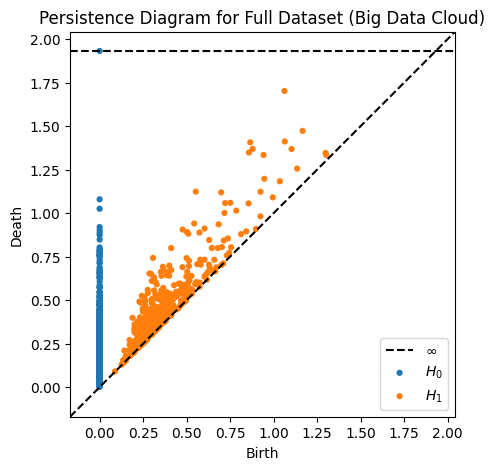

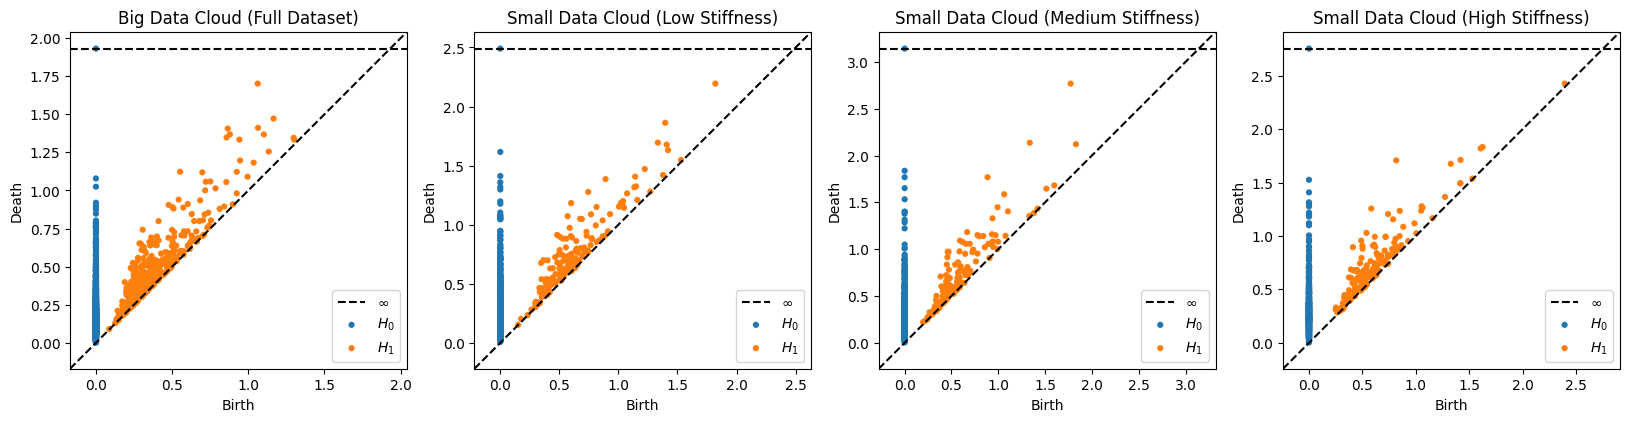

,Dataset,Num Loops (H1),Longest Persistent Loop
0,Big Data Cloud,479,0.639587
1,Low Stiffness,157,0.582752
2,Medium Stiffness,156,0.995830
3,High Stiffness,162,0.891210


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams

# Load the dataset
file_path = "/content/Simulation Results.csv"  # Ensure this matches your dataset path
df_tda = pd.read_csv(file_path)

# columns are numeric
df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]] = df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]].astype(float)

# Convert Data for TDA Analysis (Bounce Height & Stabilization Time)
data_big = df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()

# Compute Persistent Homology for the full dataset (Big Data Cloud)
result_big = ripser(data_big)['dgms']

# Plot Persistence Diagram for Full Dataset
plt.figure(figsize=(6,5))
plot_diagrams(result_big)
plt.title("Persistence Diagram for Full Dataset (Big Data Cloud)")
plt.show()

# ------------------- Small Data Clouds -------------------
# Filter Data Based on Stiffness Levels
df_stiffness_low = df_tda[df_tda["Stiffness"] == 1]
df_stiffness_medium = df_tda[df_tda["Stiffness"] == 2]
df_stiffness_high = df_tda[df_tda["Stiffness"] == 3]

# Convert Data for TDA Analysis (Small Clouds)
data_stiffness_low = df_stiffness_low[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()
data_stiffness_medium = df_stiffness_medium[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()
data_stiffness_high = df_stiffness_high[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()

# Compute Persistent Homology for Small Clouds
result_stiffness_low = ripser(data_stiffness_low)['dgms']
result_stiffness_medium = ripser(data_stiffness_medium)['dgms']
result_stiffness_high = ripser(data_stiffness_high)['dgms']

# Plot Persistence Diagrams for Each Stiffness Level
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Full Dataset
axes[0].set_title("Big Data Cloud (Full Dataset)")
plot_diagrams(result_big, show=False, ax=axes[0])

# Low Stiffness
axes[1].set_title("Small Data Cloud (Low Stiffness)")
plot_diagrams(result_stiffness_low, show=False, ax=axes[1])

# Medium Stiffness
axes[2].set_title("Small Data Cloud (Medium Stiffness)")
plot_diagrams(result_stiffness_medium, show=False, ax=axes[2])

# High Stiffness
axes[3].set_title("Small Data Cloud (High Stiffness)")
plot_diagrams(result_stiffness_high, show=False, ax=axes[3])

plt.show()

# ------------------- Summary Table -------------------
# Count the number of loops in each dataset
summary_data = {
    "Dataset": ["Big Data Cloud", "Low Stiffness", "Medium Stiffness", "High Stiffness"],
    "Num Loops (H1)": [len(result_big[1]), len(result_stiffness_low[1]), len(result_stiffness_medium[1]), len(result_stiffness_high[1])],
    "Longest Persistent Loop": [max(p[:,1] - p[:,0]) if len(p) > 0 else 0 for p in [result_big[1], result_stiffness_low[1], result_stiffness_medium[1], result_stiffness_high[1]]]
}

# Convert to DataFrame and display
summary_df = pd.DataFrame(summary_data)

# Display DataFrame to user
from IPython.display import display
display(summary_df)



In [ ]:
!pip install ripser persim --no-cache-dir


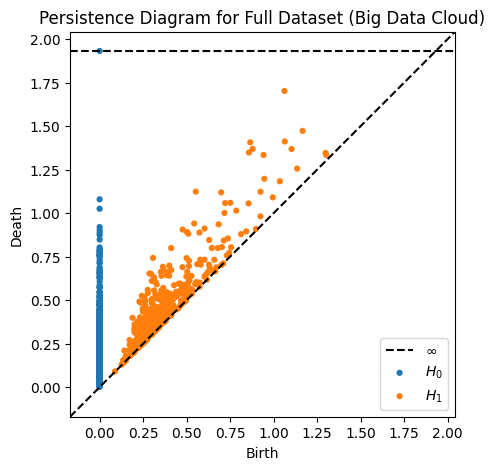

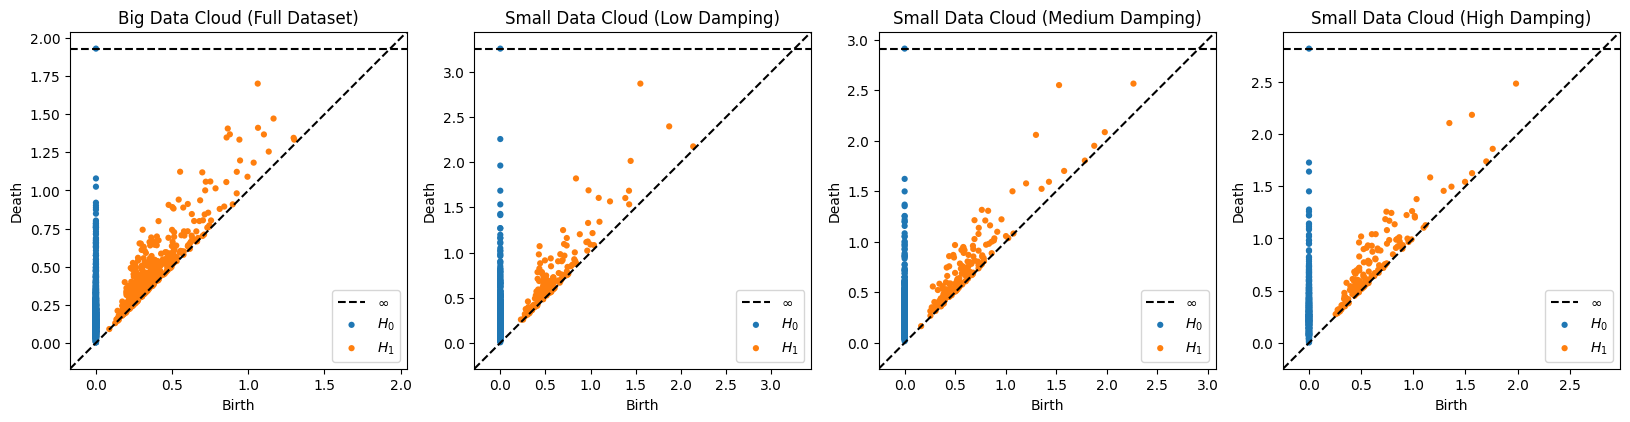

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams

# Loading the Dataset
file_path = "/content/Simulation Results.csv"
df_tda = pd.read_csv(file_path)

# columns are numeric
df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]] = df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]].astype(float)

# Convert Data for TDA Analysis (Big Cloud)
data_big = df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()
result_big = ripser(data_big)['dgms']

# Plot Persistence Diagram for Full Dataset
plt.figure(figsize=(6,5))
plot_diagrams(result_big)
plt.title("Persistence Diagram for Full Dataset (Big Data Cloud)")
plt.show()

# ------------------- Small Data Clouds for Damping -------------------
# Filter Data Based on Damping Levels
df_damping_low = df_tda[df_tda["Damping"] == df_tda["Damping"].unique()[0]]
df_damping_medium = df_tda[df_tda["Damping"] == df_tda["Damping"].unique()[1]]
df_damping_high = df_tda[df_tda["Damping"] == df_tda["Damping"].unique()[2]]

# Convert Data for TDA Analysis (Small Clouds)
data_damping_low = df_damping_low[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()
data_damping_medium = df_damping_medium[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()
data_damping_high = df_damping_high[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()

# Compute Persistent Homology for Small Clouds
result_damping_low = ripser(data_damping_low)['dgms']
result_damping_medium = ripser(data_damping_medium)['dgms']
result_damping_high = ripser(data_damping_high)['dgms']

# Plot Persistence Diagrams for Each Damping Level
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Full Dataset
axes[0].set_title("Big Data Cloud (Full Dataset)")
plot_diagrams(result_big, show=False, ax=axes[0])

# Low Damping
axes[1].set_title("Small Data Cloud (Low Damping)")
plot_diagrams(result_damping_low, show=False, ax=axes[1])

# Medium Damping
axes[2].set_title("Small Data Cloud (Medium Damping)")
plot_diagrams(result_damping_medium, show=False, ax=axes[2])

# High Damping
axes[3].set_title("Small Data Cloud (High Damping)")
plot_diagrams(result_damping_high, show=False, ax=axes[3])

plt.show()

# ------------------- Summary Table -------------------
# Count the number of loops in each dataset
summary_data = {
    "Dataset": ["Big Data Cloud", "Low Damping", "Medium Damping", "High Damping"],
    "Num Loops (H1)": [len(result_big[1]), len(result_damping_low[1]), len(result_damping_medium[1]), len(result_damping_high[1])],
    "Longest Persistent Loop": [max(p[:,1] - p[:,0]) if len(p) > 0 else 0 for p in [result_big[1], result_damping_low[1], result_damping_medium[1], result_damping_high[1]]]
}

# Convert to DataFrame and display
summary_df = pd.DataFrame(summary_data)

# Display DataFrame to user
from IPython.display import display
display(summary_df)



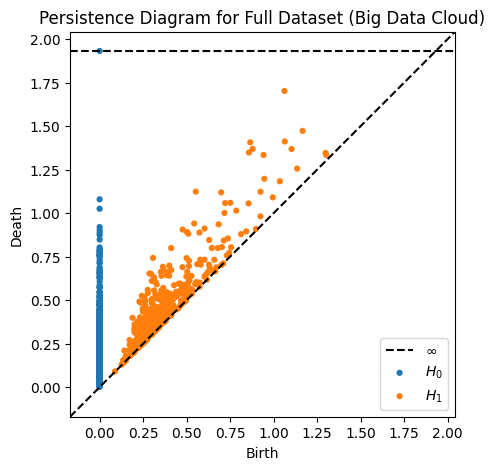

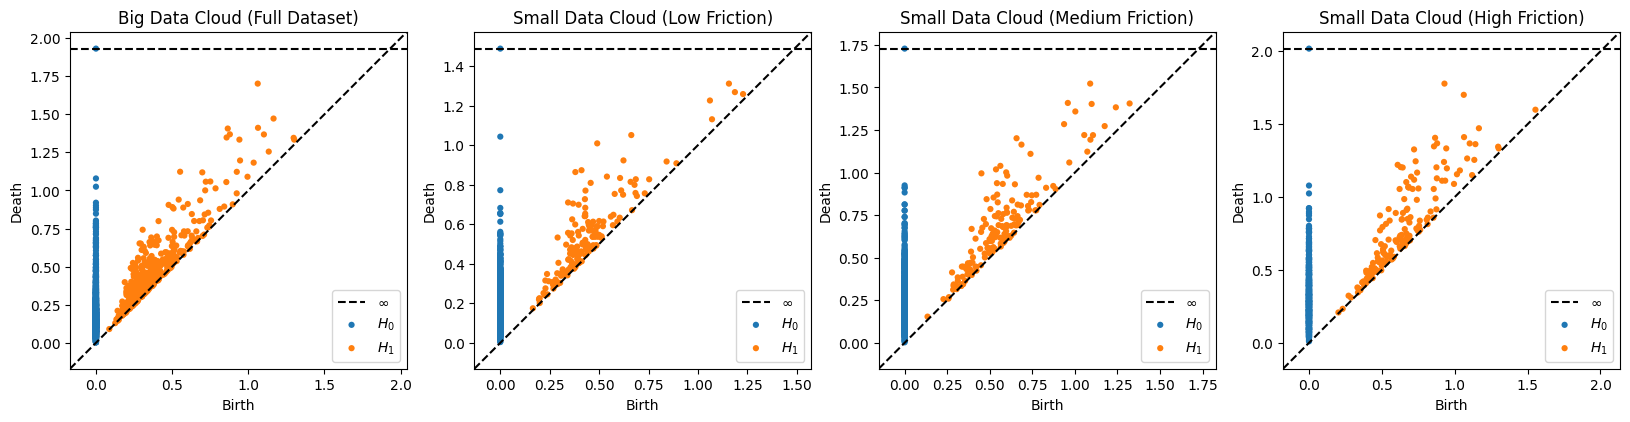

,Dataset,Num Loops (H1),Longest Persistent Loop
0,Big Data Cloud,479,0.639587
1,Low Friction,155,0.518680
2,Medium Friction,158,0.544490
3,High Friction,146,0.849011


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams

# Loading the Dataset
file_path = "/content/Simulation Results.csv"
df_tda = pd.read_csv(file_path)

# columns are numeric
df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]] = df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]].astype(float)

# Convert Data for TDA Analysis (Big Cloud)
data_big = df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()
result_big = ripser(data_big)['dgms']

# Plot Persistence Diagram for Full Dataset
plt.figure(figsize=(6,5))
plot_diagrams(result_big)
plt.title("Persistence Diagram for Full Dataset (Big Data Cloud)")
plt.show()
# ------------------- Small Data Clouds for Friction -------------------
# Filter Data Based on Friction Levels
df_friction_low = df_tda[df_tda["Friction"] == df_tda["Friction"].unique()[0]]
df_friction_medium = df_tda[df_tda["Friction"] == df_tda["Friction"].unique()[1]]
df_friction_high = df_tda[df_tda["Friction"] == df_tda["Friction"].unique()[2]]

# Convert Data for TDA Analysis (Small Clouds)
data_friction_low = df_friction_low[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()
data_friction_medium = df_friction_medium[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()
data_friction_high = df_friction_high[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()

# Compute Persistent Homology for Small Clouds
result_friction_low = ripser(data_friction_low)['dgms']
result_friction_medium = ripser(data_friction_medium)['dgms']
result_friction_high = ripser(data_friction_high)['dgms']

# Plot Persistence Diagrams for Each Friction Level
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Full Dataset
axes[0].set_title("Big Data Cloud (Full Dataset)")
plot_diagrams(result_big, show=False, ax=axes[0])

# Low Friction
axes[1].set_title("Small Data Cloud (Low Friction)")
plot_diagrams(result_friction_low, show=False, ax=axes[1])

# Medium Friction
axes[2].set_title("Small Data Cloud (Medium Friction)")
plot_diagrams(result_friction_medium, show=False, ax=axes[2])

# High Friction
axes[3].set_title("Small Data Cloud (High Friction)")
plot_diagrams(result_friction_high, show=False, ax=axes[3])

plt.show()

# ------------------- Summary Table for Friction -------------------
summary_data_friction = {
    "Dataset": ["Big Data Cloud", "Low Friction", "Medium Friction", "High Friction"],
    "Num Loops (H1)": [len(result_big[1]), len(result_friction_low[1]), len(result_friction_medium[1]), len(result_friction_high[1])],
    "Longest Persistent Loop": [max(p[:,1] - p[:,0]) if len(p) > 0 else 0 for p in [result_big[1], result_friction_low[1], result_friction_medium[1], result_friction_high[1]]]
}

# Convert to DataFrame and display
summary_df_friction = pd.DataFrame(summary_data_friction)

# Display DataFrame to user
from IPython.display import display
display(summary_df_friction)



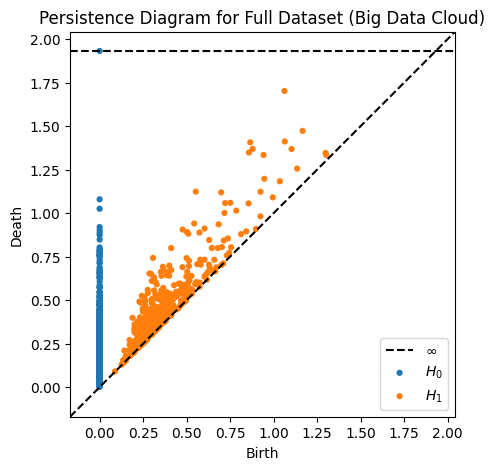

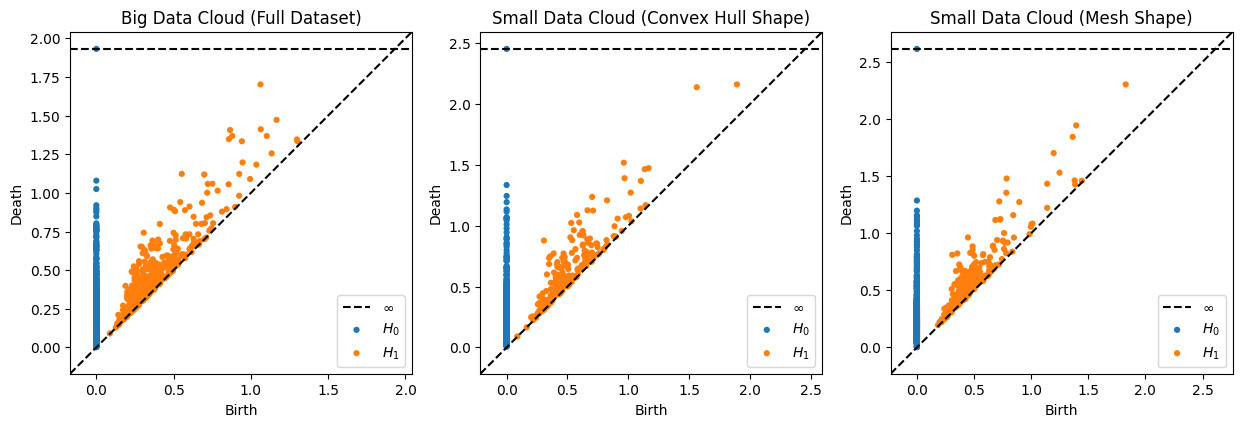

,Dataset,Num Loops (H1),Longest Persistent Loop
0,Big Data Cloud,479,0.639587
1,Convex Hull Shape,229,0.575315
2,Mesh Shape,235,0.693212


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams

# Loading the Dataset
file_path = "/content/Simulation Results.csv"
df_tda = pd.read_csv(file_path)

# columns are numeric
df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]] = df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]].astype(float)

# Convert Data for TDA Analysis (Big Cloud)
data_big = df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()
result_big = ripser(data_big)['dgms']

# Plot Persistence Diagram for Full Dataset
plt.figure(figsize=(6,5))
plot_diagrams(result_big)
plt.title("Persistence Diagram for Full Dataset (Big Data Cloud)")
plt.show()
# ------------------- Small Data Clouds for Shape -------------------
# Filter Data Based on Shape (Convex Hull vs Mesh)
df_shape_convex = df_tda[df_tda["Shape"] == "Convex Hull"]
df_shape_mesh = df_tda[df_tda["Shape"] == "Mesh"]

# Convert Data for TDA Analysis (Small Clouds)
data_shape_convex = df_shape_convex[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()
data_shape_mesh = df_shape_mesh[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()

# Compute Persistent Homology for Small Clouds
result_shape_convex = ripser(data_shape_convex)['dgms']
result_shape_mesh = ripser(data_shape_mesh)['dgms']

# Plot Persistence Diagrams for Each Shape
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Full Dataset
axes[0].set_title("Big Data Cloud (Full Dataset)")
plot_diagrams(result_big, show=False, ax=axes[0])

# Convex Hull Shape
axes[1].set_title("Small Data Cloud (Convex Hull Shape)")
plot_diagrams(result_shape_convex, show=False, ax=axes[1])

# Mesh Shape
axes[2].set_title("Small Data Cloud (Mesh Shape)")
plot_diagrams(result_shape_mesh, show=False, ax=axes[2])

plt.show()

# ------------------- Summary Table for Shape -------------------
summary_data_shape = {
    "Dataset": ["Big Data Cloud", "Convex Hull Shape", "Mesh Shape"],
    "Num Loops (H1)": [len(result_big[1]), len(result_shape_convex[1]), len(result_shape_mesh[1])],
    "Longest Persistent Loop": [max(p[:,1] - p[:,0]) if len(p) > 0 else 0 for p in [result_big[1], result_shape_convex[1], result_shape_mesh[1]]]
}

# Convert to DataFrame and display
summary_df_shape = pd.DataFrame(summary_data_shape)

# Display DataFrame to user
from IPython.display import display
display(summary_df_shape)



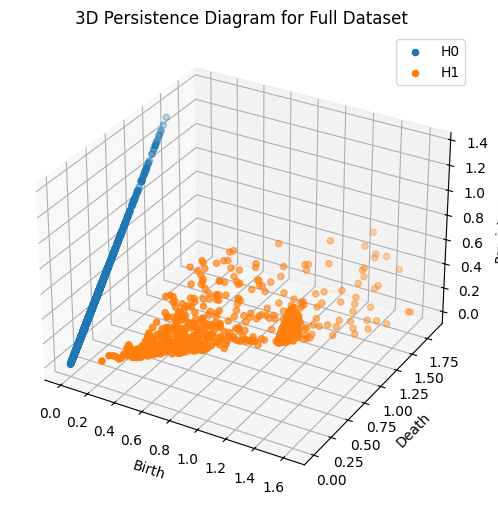

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ripser import ripser
from persim import plot_diagrams

# Load the dataset
file_path = "/content/Simulation Results.csv"  # Update path if needed
df_tda = pd.read_csv(file_path)

# Ensure relevant columns are numeric
df_tda[["Bounce Height (cm)", "Stabilization Time (s)", "Stiffness"]] = df_tda[["Bounce Height (cm)", "Stabilization Time (s)", "Stiffness"]].astype(float)

# Convert Data for TDA Analysis (Bounce Height & Stabilization Time)
data_big = df_tda[["Bounce Height (cm)", "Stabilization Time (s)", "Stiffness"]].to_numpy()

# Compute Persistent Homology
result_big = ripser(data_big)['dgms']

# 3D Persistence Diagram
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for i, dg in enumerate(result_big):
    birth = dg[:, 0]
    death = dg[:, 1]
    persistence = death - birth
    ax.scatter(birth, death, persistence, label=f"H{i}")

ax.set_xlabel("Birth")
ax.set_ylabel("Death")
ax.set_zlabel("Persistence")
ax.set_title("3D Persistence Diagram for Full Dataset")
ax.legend()
plt.show()




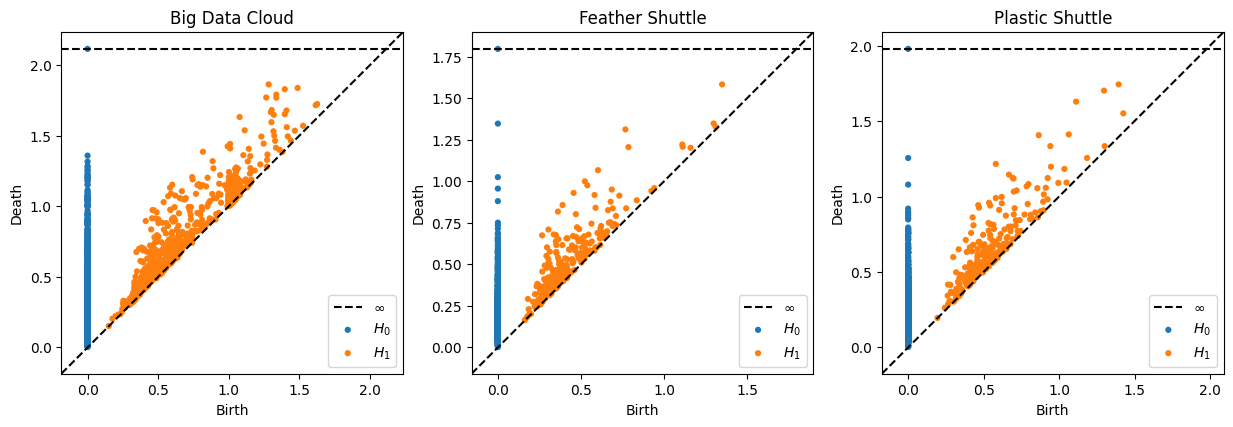

In [ ]:
# Filter data based on shuttle type
df_feather = df_tda[df_tda["Shuttle Type"] == "Feather"]
df_plastic = df_tda[df_tda["Shuttle Type"] == "Plastic"]

# Convert Data for TDA Analysis
data_feather = df_feather[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()
data_plastic = df_plastic[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()

# Compute Persistent Homology
result_feather = ripser(data_feather)['dgms']
result_plastic = ripser(data_plastic)['dgms']

# Plot Persistence Diagrams
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Full Dataset
axes[0].set_title("Big Data Cloud")
plot_diagrams(result_big, show=False, ax=axes[0])

# Feather Shuttle
axes[1].set_title("Feather Shuttle")
plot_diagrams(result_feather, show=False, ax=axes[1])

# Plastic Shuttle
axes[2].set_title("Plastic Shuttle")
plot_diagrams(result_plastic, show=False, ax=axes[2])

plt.show()


In [ ]:
# Compute number of loops and longest persistent loops
summary_data = {
    "Dataset": ["Big Data Cloud", "Feather Shuttle", "Plastic Shuttle"],
    "Num Loops (H1)": [len(result_big[1]), len(result_feather[1]), len(result_plastic[1])],
    "Longest Persistent Loop": [max(p[:,1] - p[:,0]) if len(p) > 0 else 0 for p in [result_big[1], result_feather[1], result_plastic[1]]]
}

# Convert to DataFrame and display
summary_df = pd.DataFrame(summary_data)

# Display DataFrame
from IPython.display import display
display(summary_df)


,Dataset,Num Loops (H1),Longest Persistent Loop
0,Big Data Cloud,1089,0.580225
1,Feather Shuttle,236,0.544647
2,Plastic Shuttle,232,0.635183


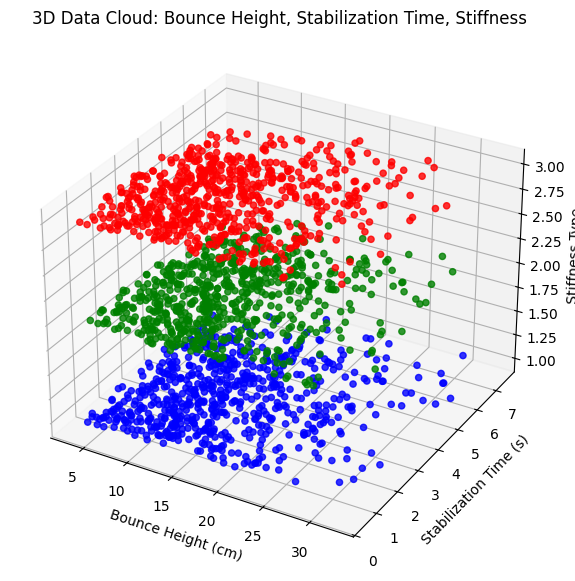

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = "/content/Simulation Results.csv"  # Ensure the correct path
df_tda = pd.read_csv(file_path)

# Extract 3D Data for Visualization
X = df_tda["Bounce Height (cm)"]
Y = df_tda["Stabilization Time (s)"]
Z = df_tda["Stiffness"]

# Define Colors Based on Stiffness Level
colors = np.where(Z == 1, 'blue', np.where(Z == 2, 'green', 'red'))  # Blue for Low, Green for Medium, Red for High

# Create 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with new colors
ax.scatter(X, Y, Z, c=colors, alpha=0.8)

# Labels and Title
ax.set_xlabel("Bounce Height (cm)")
ax.set_ylabel("Stabilization Time (s)")
ax.set_zlabel("Stiffness Type")
ax.set_title("3D Data Cloud: Bounce Height, Stabilization Time, Stiffness")

plt.show()


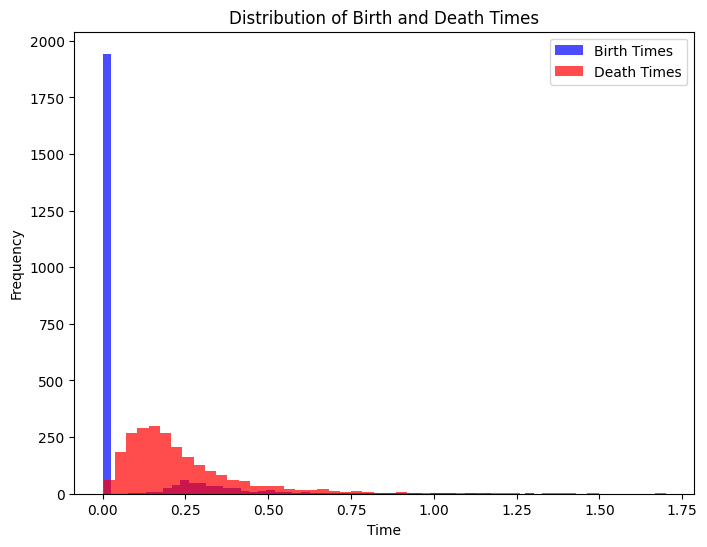

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser

# Ensure result_extended is computed
data = df_tda[["Bounce Height (cm)", "Stabilization Time (s)"]].to_numpy()
result_extended = ripser(data, do_cocycles=False)['dgms']  # Compute H0, H1, H2

# Extract birth and death times
birth_times = []
death_times = []

for dim in range(len(result_extended)):  # Loop over H0, H1, H2
    for birth, death in result_extended[dim]:
        if np.isfinite(birth) and np.isfinite(death):  # Filter out infinite values
            birth_times.append(birth)
            death_times.append(death)

# Plot Distribution of Birth & Death Times
plt.figure(figsize=(8, 6))
plt.hist(birth_times, bins=50, alpha=0.7, label="Birth Times", color='blue')
plt.hist(death_times, bins=50, alpha=0.7, label="Death Times", color='red')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Birth and Death Times")
plt.show()


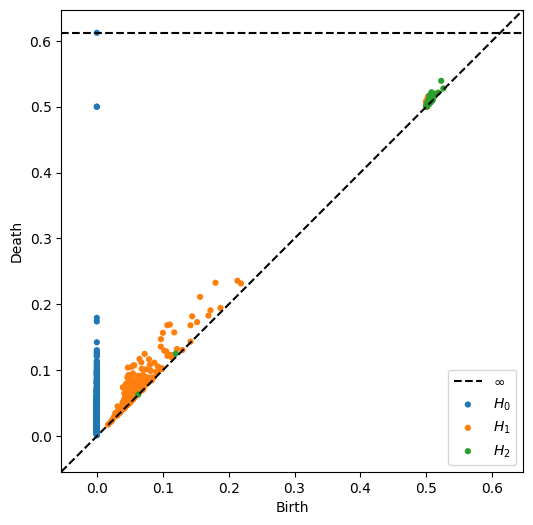

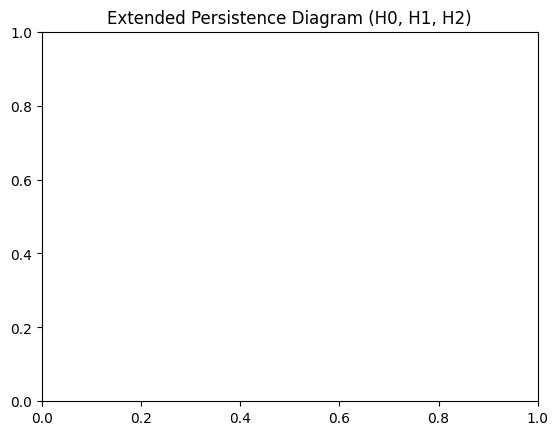

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams

# Load dataset (Ensure correct path)
file_path = "/content/Simulation Results.csv"
df_tda = pd.read_csv(file_path)

# Convert relevant columns to numeric
df_tda[["Bounce Height (cm)", "Stabilization Time (s)", "Stiffness"]] = df_tda[
    ["Bounce Height (cm)", "Stabilization Time (s)", "Stiffness"]
].astype(float)

# Reduce dataset size for efficiency (if dataset is too large)
df_sampled = df_tda.sample(n=min(1000, len(df_tda)), random_state=42)  # Max 1000 points

# Extract data for TDA
data_tda = df_sampled[["Bounce Height (cm)", "Stabilization Time (s)", "Stiffness"]].to_numpy()

# Normalize data (scale between 0 and 1)
data_tda = (data_tda - np.min(data_tda, axis=0)) / (np.max(data_tda, axis=0) - np.min(data_tda, axis=0))

# Compute Persistent Homology up to H2
result_extended = ripser(data_tda, maxdim=2)['dgms']

# Plot Extended Persistence Diagram (H0, H1, H2)
plt.figure(figsize=(8, 6))
plot_diagrams(result_extended, show=True)
plt.title("Extended Persistence Diagram (H0, H1, H2)")
plt.show()


